# Advanced Numerical Analysis

## Exercise 2

_For_ $n= 2^k$ _compare the computation time of the eigenvalues of the_ $n\times n$ _matrix_ $A$ _with entries_

$(\textrm{i})\ \ \quad A_{ij} = i+j$  
$(\textrm{ii})\ \quad A_{ij} = i+j^2$  
$(\textrm{iii}) \quad A_{ij} = \sqrt{ij+i+1}$  
$(\textrm{iv})\: \! \quad A_{ij} = -\max(3-|i-j|,0)$  
$(\textrm{v})\ \: \! \quad A_{ij} = -\max(3-|i-j|,0)$ _in sparse representation_

In [1]:
memory = 4 * 2^30; %bytes
dense_maximum = floor(log2(memory / 8) / 2)
sparse_maximum = floor(log2((memory / 8 + 6) / 5))

dense_maximum = 14
sparse_maximum = 26


In [2]:
dense_maximum = 12; % to reduce total runtime
clear time
for k = 1:dense_maximum;
    m = 1:2^k;
    
    clear A
    A = m + m';
    tic(); eig(A); time(k, 1) = toc();
    
    clear A
    A = m + (m.^2)';
    tic(); eig(A); time(k, 2) = toc();
    
    clear A
    A = sqrt(m .* m' + m + 1);
    tic(); eig(A); time(k, 3) = toc();
    
    clear A
    A = -max(3 - abs(m - m'), 0);
    tic(); eig(A); time(k, 4) = toc();
endfor

In [3]:
sparse_maximum = 12; % to reduce total runtime
for k = 1:sparse_maximum;
    n = 2^k;
    m = 1:n;
    clear A
    
    A = -3 * speye(n);
    A = spdiags(-2*ones(n,2), [-1,1], A);
    A = spdiags(-ones(n,2), [-2,2], A);
    tic(); eigs(A, n); time(k, 5) = toc();
endfor

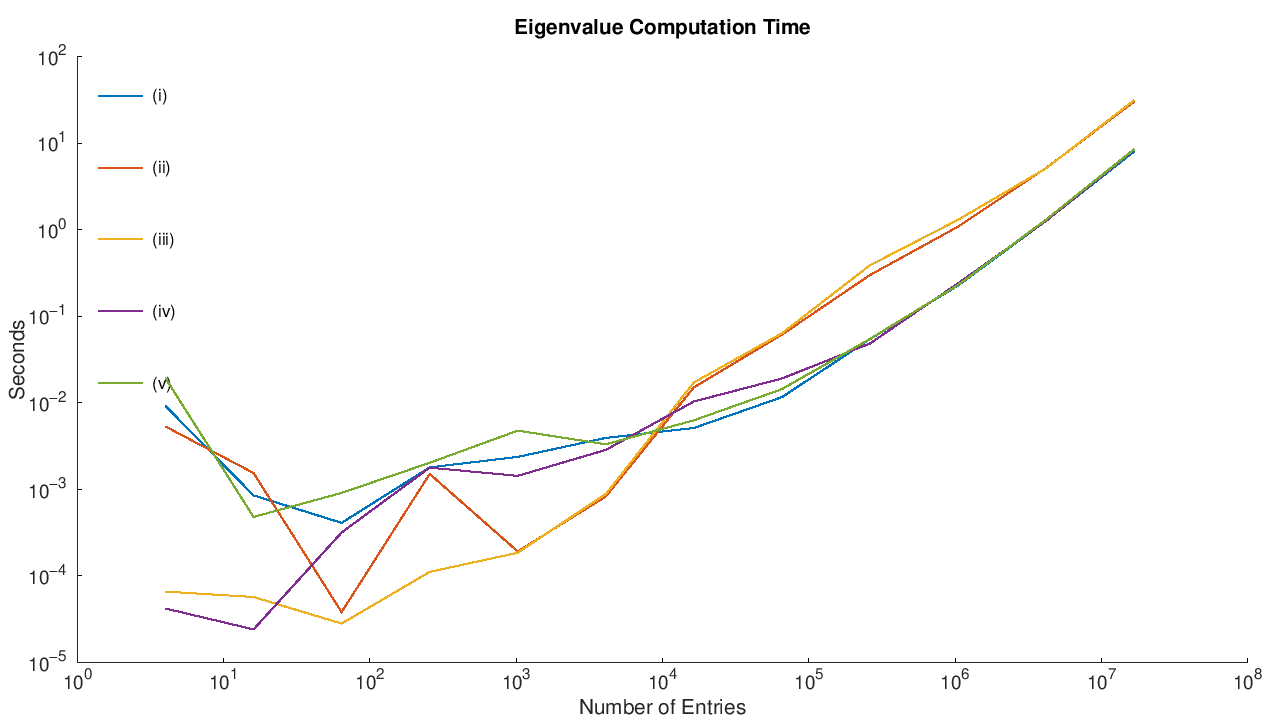

In [5]:
%plot -s 1280,720
x1 = (2.^[1:dense_maximum]).^2;
x2 = (2.^[1:sparse_maximum]).^2;
hold on
loglog(x1, time(:, 1:4), "linewidth", 4);
loglog(x2, time(:, 5), "linewidth", 4)

title("Eigenvalue Computation Time");
xlabel("Number of Entries");
ylabel("Seconds");
legend({"(i)", "(ii)", "(iii)", "(iv)", "(v)"}, "box", "off", "location", "northwest", "fontsize", 9);

For a small number of entries the measurements might not be very reliable. The trend from around $10^5$ entries onwards may continue because the matrices in $(\textrm{i}), (\textrm{iv})$ and $(\textrm{v})$ are symmetric and eigenvalues from those can be more efficiently computed.